## Problem 1

Find the numerical solution of the problem 

$\dot{y}=-\alpha y + e^{-\beta t}$

with $y(0) = 1$ and $(\alpha,\beta) = (5,1)$ in the interval $[0,1]$ using the following formulas

(a) the Forward Euler Formula

(b) the Backward Euler Formula

(c) the Improved Euler Formula (i.e. the Heun Formula)

in the interval $[0,1]$ with h=0.05, h=0.025, and h=0.01

### Analytic Solution

For the purposes for checking the accuracy of the scheme and to measure the error, I calculate the exact analytic solution as that is possible for this equation.

$\dot{y}=-\alpha y + e^{-\beta t}$

$\dot{y} + \alpha y = + e^{-\beta t}$

$e^{\alpha t} \dot{y} + \alpha e^{\alpha t} y = e^{-\beta t} e^{\alpha t}$ 

$\frac{d}{dt}[e^{\alpha t}y]=e^{(\alpha-\beta)t}$

$\int\frac{d}{dt}[e^{\alpha t}y]dt=\int e^{(\alpha-\beta)t}dt$

$e^{\alpha t}y=\frac{e^{(\alpha-\beta)t}}{\alpha-\beta}+C$

$\therefore$ since $(\alpha,\beta) = (5,1)$

$y(t)=\frac{e^{-t}}{4}+Ce^{-5t}$

Solving for the initial condition

$y(0)=\frac{e^{0}}{4}+Ce^{0}=1$

$\frac{1}{4}+C=1$

$\therefore$

$C=\frac{3}{4}$

$y(t)=\frac{e^{-t}+3e^{-5t}}{4}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [16]:
def y_dot(y, t, a, b):
    """
    Returns an ordinary differential equation to be calculated via a scheme.
    Take in array elements "y" and "t" and constants "a" and "b"
    """
    return -a*y+np.e**(-b*t)


def y(t, a, b, y0):
    """
    Exact solution of y_dot(y, t) calculated analytically.
    Take in an array element "t", constants "a" and "b", and an initial
    condition y0
    """
    c = (a - b - y0)
    return (np.e**(-b*t)+c*np.e**(-a*t))/(a-b)

def forward_euler(t, a, b):
    """
    Takes in an array "t" and constants "a" and "b" and returns a numerical solution
    of an ODE, y_dot, calculated with the forward euler scheme. A function
    named y_dot(y, t) containing the differential equation
    to solve must be suppled to this function
    """
    # Initial variables
    I = t.size
    v = np.zeros(t.size)
    
    # Calculating the Forward Euler Scheme
    for i in range (0,I):
        if i == 0:
            v[i] = y0
        else:
            v[i] = v[i-1] + h*y_dot(v[i-1], t[i-1], a, b)
    return v

def backward_euler(t, a, b):
    """
    Takes in an array "t" and constants "a" and "b" and returns a numerical solution
    of an ODE, y_dot, calculated with the backward euler scheme.
    """
    # Initial variables
    I = t.size
    v = np.zeros(t.size)
    
    # Calculating the Backward Euler Scheme
    for i in range (0,I):
        if i == 0:
            v[i] = y0
        else:
            v[i] = v[i-1] + h*y_dot(v[i-1] + h*y_dot(v[i-1], t[i-1], a, b), t[i], a, b)#(v[i-1] + h*np.e**(-b*t[i])) / (1 + a*h)
    return v

def heun(t, a, b):
    """
    Takes in an array "t" and constants "a" and "b" and returns a numerical solution
    of an ODE, y_dot, calculated with the heun scheme. A function
    named y_dot(y, t) containing the differential equation
    to solve must be suppled to this function
    """
    # Initial variables
    I = t.size
    v = np.zeros(t.size)
    
    # Calculating the Heun (Improved Euler) Scheme
    for i in range (0,I):
        if i == 0:
            v[i] = y0
        else:
            v[i] = v[i-1] + h/2*(y_dot(v[i-1], t[i-1], a, b) + y_dot(v[i-1] + h*y_dot(v[i-1], t[i-1], a, b), t[i], a, b))
    return v


Values of schemes, exact solution, and relative error for h=0.05 

   t    forward euler    backward euler      heun      exact    forward err(%)    backward err(%)    heun err(%)
----  ---------------  ----------------  --------  ---------  ----------------  -----------------  -------------
0           1                  1         1         1                   0                  0             0
0.05        0.8                0.847561  0.823781  0.821908            2.6655             3.12122       0.227859
0.1         0.647561           0.721995  0.684035  0.681107            4.9252             6.00314       0.429864
0.15        0.530913           0.618346  0.572886  0.569452            6.76772            8.58617       0.603033
0.2         0.44122            0.532584  0.484174  0.480592            8.19242           10.8182        0.745201
0.25        0.371852           0.46143   0.413082  0.409579            9.21121           12.6597        0.85529
0.3         0.317829           0.4022

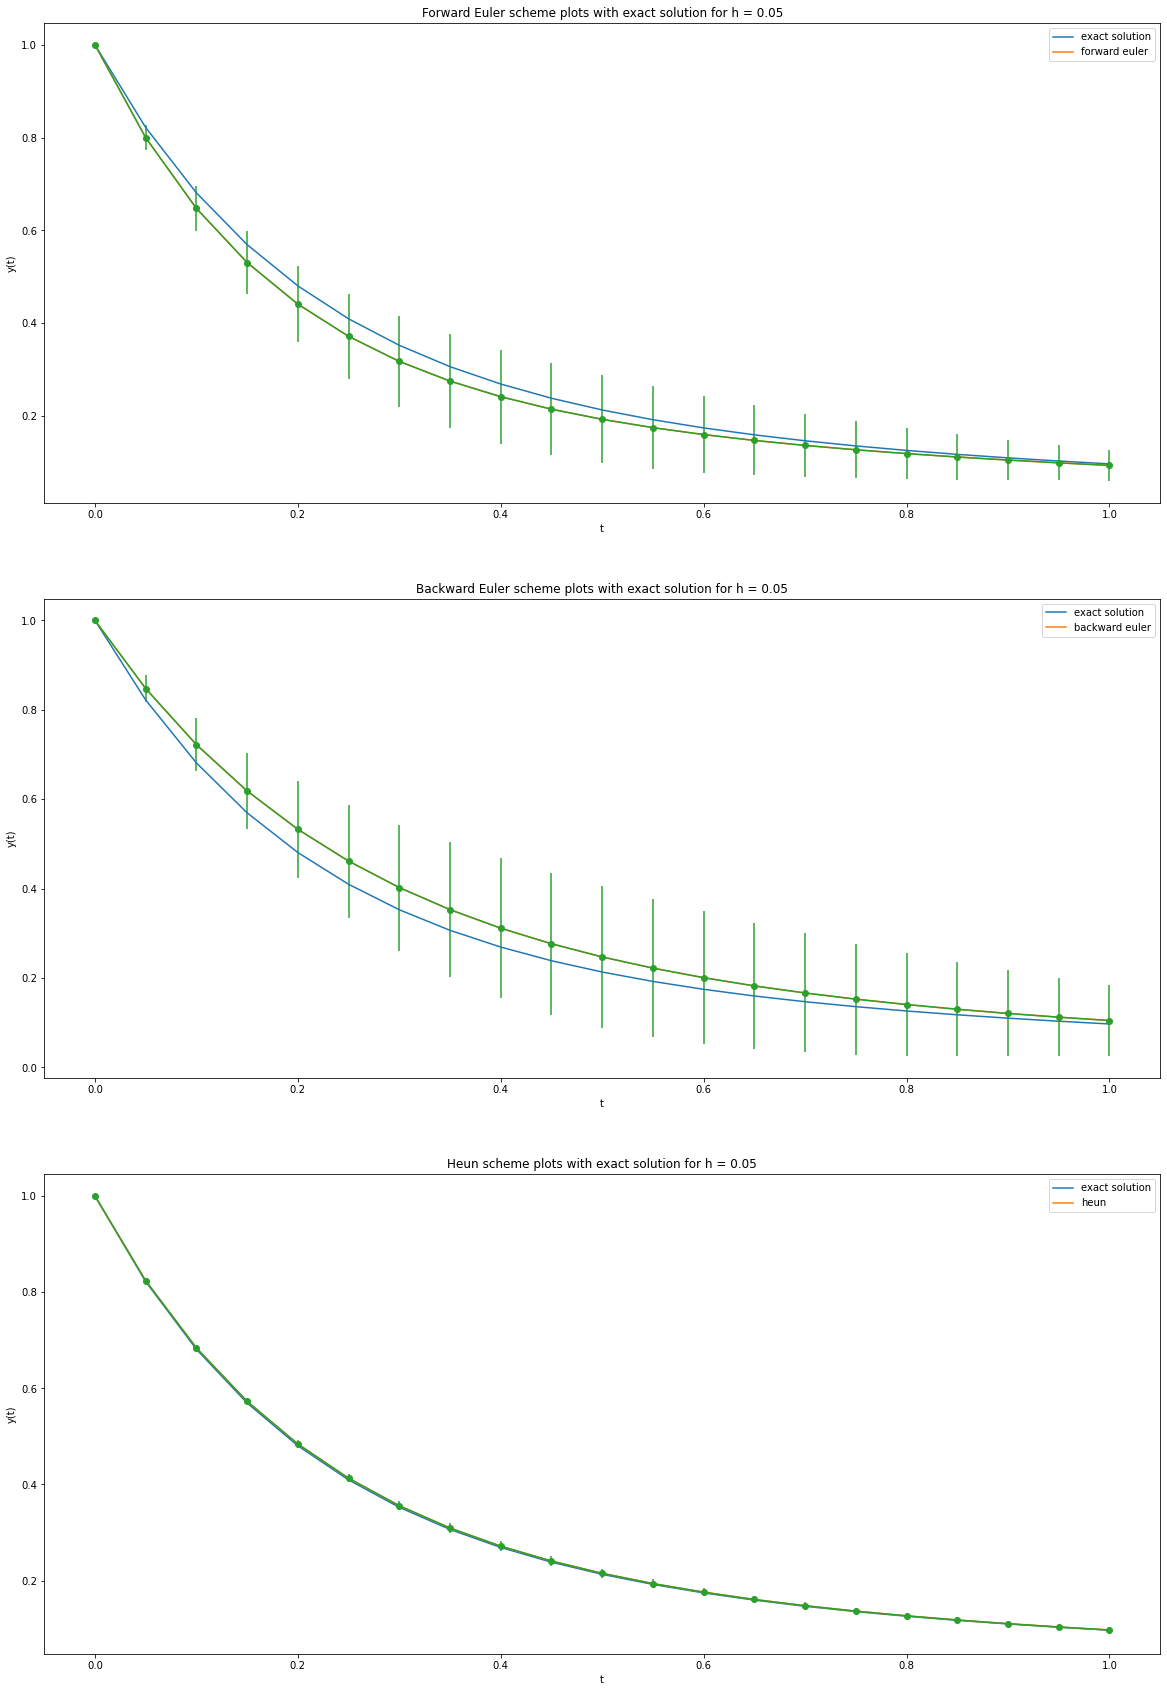

In [7]:
# Global variables
x_min = 0
x_max = 1
h = 0.05
a = 5
b = 1
y0 = 1

# Creating the grid points 
x = np.zeros(int((x_max-x_min)/h))
x[0] = x_min
for i in range(1, x.size):
    x[i] = x[i-1]+h
x = np.append(x, x_max)

# Creating table
first_row = ['t', 'forward euler', 'backward euler', 'heun', 'exact', 
             'forward err(%)', 'backward err(%)', 'heun err(%)']
table = [first_row]

# Calculating the exact solution and error
exact = np.zeros(x.size)
rows = np.zeros((x.size,8))
forward_error = np.zeros(x.size)
backward_error = np.zeros(x.size)
heun_error = np.zeros(x.size)


for i in range(0,x.size):
    exact[i] = y(x[i], a, b, y0)

    # Calculating relative error 
    forward_error[i] = np.abs((exact[i] - forward_euler(x, a, b)[i]) / exact[i])
    backward_error[i] = np.abs((exact[i] - backward_euler(x, a, b)[i]) / exact[i])
    heun_error[i] = np.abs((exact[i] - heun(x, a, b)[i]) / exact[i])
    """
    The relative error calculations are not multiplied by 100 as we do not want
    to plot percentages but values for error bars. In the table the values are listed
    as percents
    """
    # Calculating table rows
    rows[i,0] = x[i]
    rows[i,1] = forward_euler(x, a, b)[i]
    rows[i,2] = backward_euler(x, a, b)[i]
    rows[i,3] = heun(x, a, b)[i]
    rows[i,4] = exact[i]
    rows[i,5] = 100*forward_error[i]
    rows[i,6] = 100*backward_error[i]
    rows[i,7] = 100*heun_error[i]
    table.append(rows[i,:].tolist())

# Printing Table
title = 'Values of schemes, exact solution, and relative error for h=' +str(h)
title = title.center(20)
print(title, '\n')
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancygrid'))

# Plotting solutions with error

plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
plt.plot(x,exact, label="exact solution")
plt.plot(x, forward_euler(x, a, b), label="forward euler") # problem 1a
plt.errorbar(x, forward_euler(x, a, b), yerr = forward_error, fmt = '-o') #problem 3a
plt.title('Forward Euler scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

plt.subplot(3,1,2)
plt.plot(x,exact, label="exact solution")
plt.plot(x, backward_euler(x, a, b), label="backward euler") # problem 2a
plt.errorbar(x, backward_euler(x, a, b), yerr = backward_error, fmt = '-o') #problem 3a
plt.title('Backward Euler scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

plt.subplot(3,1,3)
plt.plot(x,exact, label="exact solution")
plt.plot(x, heun(x, a, b), label="heun") # problem 1a
plt.errorbar(x, heun(x, a, b), yerr = heun_error, fmt = '-o') #problem 3a
plt.title('Heun scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

Values of schemes, exact solution, and relative error for h=0.025 

    t    forward euler    backward euler       heun      exact    forward err(%)    backward err(%)    heun err(%)
-----  ---------------  ----------------  ---------  ---------  ----------------  -----------------  -------------
0            1                 1          1          1                  0                  0             0
0.025        0.9               0.911883   0.905941   0.9057             0.629364           0.682631      0.0266334
0.05         0.811883          0.832878   0.822334   0.821908           1.21975            1.33476       0.0518605
0.075        0.734178          0.762003   0.747968   0.747403           1.76942            1.9535        0.0755866
0.1          0.665599          0.698381   0.681773   0.681107           2.27686            2.53611       0.0977242
0.125        0.60502           0.64123    0.622806   0.62207            2.74082            3.08005       0.118196
0.15         0.551455

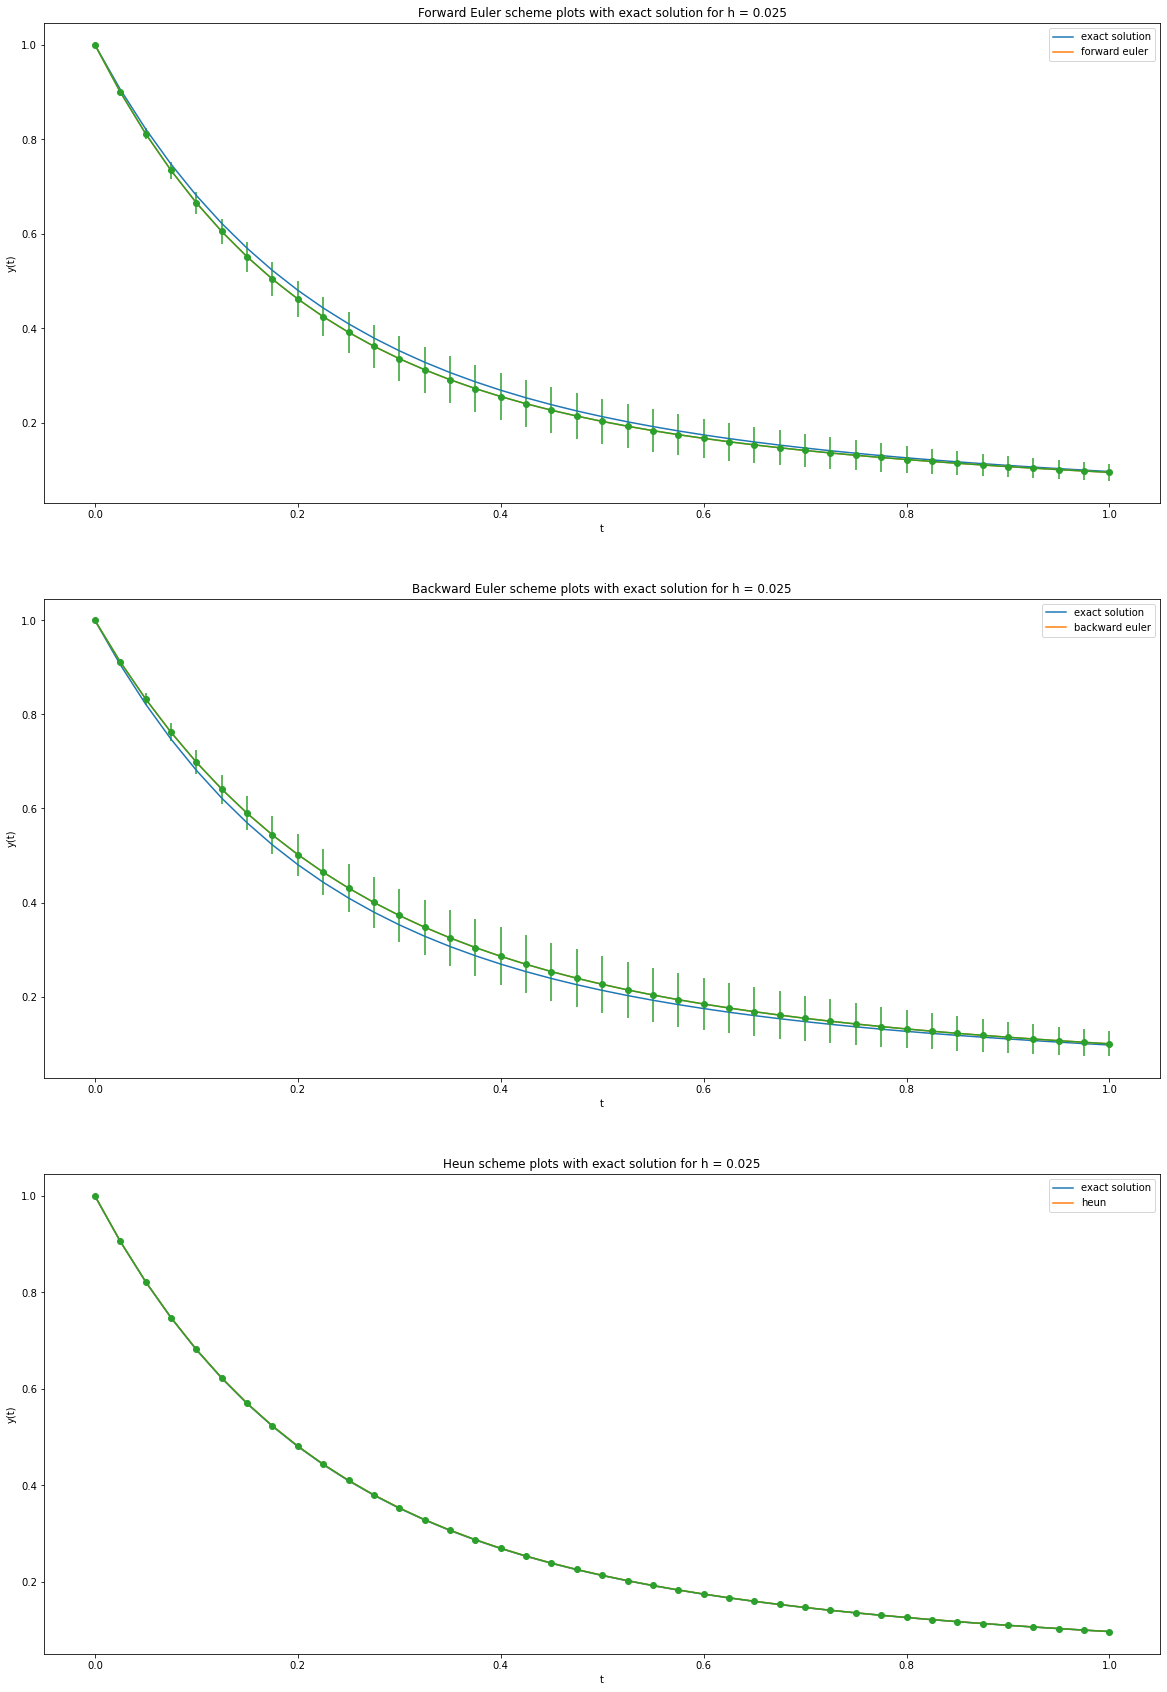

In [8]:
# Global variables
x_min = 0
x_max = 1
h = 0.025
a = 5
b = 1
y0 = 1

# Creating the grid points 
x = np.zeros(int((x_max-x_min)/h))
x[0] = x_min
for i in range(1, x.size):
    x[i] = x[i-1]+h
x = np.append(x, x_max)

# Creating table
first_row = ['t', 'forward euler', 'backward euler', 'heun', 'exact', 
             'forward err(%)', 'backward err(%)', 'heun err(%)']
table = [first_row]

# Calculating the exact solution and error
exact = np.zeros(x.size)
rows = np.zeros((x.size,8))
forward_error = np.zeros(x.size)
backward_error = np.zeros(x.size)
heun_error = np.zeros(x.size)


for i in range(0,x.size):
    exact[i] = y(x[i], a, b, y0)

    # Calculating relative error 
    forward_error[i] = np.abs((exact[i] - forward_euler(x, a, b)[i]) / exact[i])
    backward_error[i] = np.abs((exact[i] - backward_euler(x, a, b)[i]) / exact[i])
    heun_error[i] = np.abs((exact[i] - heun(x, a, b)[i]) / exact[i])
    """
    The relative error calculations are not multiplied by 100 as we do not want
    to plot percentages but values for error bars. In the table the values are listed
    as percents
    """
    # Calculating table rows
    rows[i,0] = x[i]
    rows[i,1] = forward_euler(x, a, b)[i]
    rows[i,2] = backward_euler(x, a, b)[i]
    rows[i,3] = heun(x, a, b)[i]
    rows[i,4] = exact[i]
    rows[i,5] = 100*forward_error[i]
    rows[i,6] = 100*backward_error[i]
    rows[i,7] = 100*heun_error[i]
    table.append(rows[i,:].tolist())

# Printing Table
title = 'Values of schemes, exact solution, and relative error for h=' +str(h)
title = title.center(20)
print(title, '\n')
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancygrid'))

# Plotting solutions with error

plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
plt.plot(x,exact, label="exact solution")
plt.plot(x, forward_euler(x, a, b), label="forward euler") # problem 1a
plt.errorbar(x, forward_euler(x, a, b), yerr = forward_error, fmt = '-o') #problem 3a
plt.title('Forward Euler scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

plt.subplot(3,1,2)
plt.plot(x,exact, label="exact solution")
plt.plot(x, backward_euler(x, a, b), label="backward euler") # problem 2a
plt.errorbar(x, backward_euler(x, a, b), yerr = backward_error, fmt = '-o') #problem 3a
plt.title('Backward Euler scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

plt.subplot(3,1,3)
plt.plot(x,exact, label="exact solution")
plt.plot(x, heun(x, a, b), label="heun") # problem 1a
plt.errorbar(x, heun(x, a, b), yerr = heun_error, fmt = '-o') #problem 3a
plt.title('Heun scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

Values of schemes, exact solution, and relative error for h=0.01 

   t    forward euler    backward euler       heun      exact    forward err(%)    backward err(%)    heun err(%)
----  ---------------  ----------------  ---------  ---------  ----------------  -----------------  -------------
0           1                 1          1          1                 0                   0            0
0.01        0.96              0.9619     0.96095    0.960935          0.0972519           0.100524     0.00163615
0.02        0.9219            0.925517   0.923708   0.923678          0.192408            0.199145     0.00323952
0.03        0.885607          0.890769   0.888185   0.888142          0.285417            0.295798     0.00480915
0.04        0.851032          0.857581   0.8543     0.854245          0.376225            0.390423     0.0063441
0.05        0.818088          0.825877   0.821972   0.821908          0.464782            0.482959     0.00784344
0.06        0.786696          0

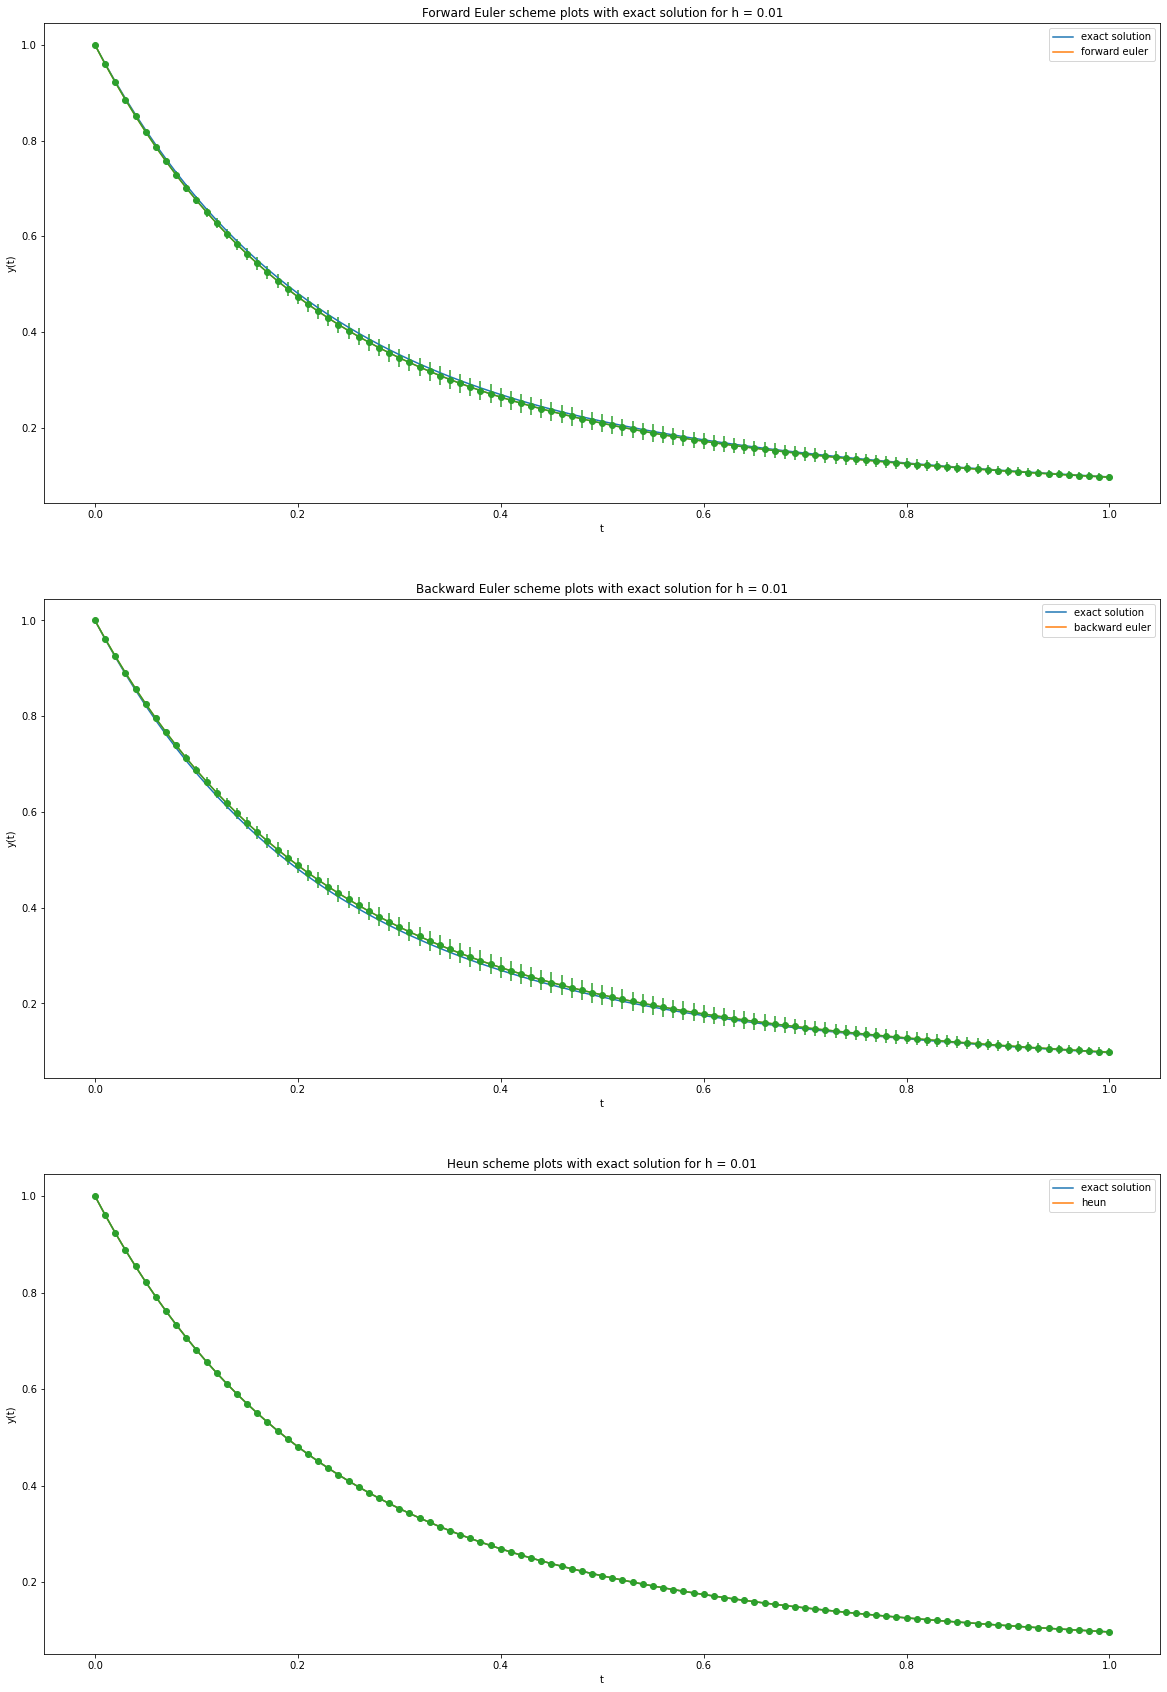

In [9]:
# Global variables
x_min = 0
x_max = 1
h = 0.01
a = 5
b = 1
y0 = 1

# Creating the grid points 
x = np.zeros(int((x_max-x_min)/h))
x[0] = x_min
for i in range(1, x.size):
    x[i] = x[i-1]+h
x = np.append(x, x_max)

# Creating table
first_row = ['t', 'forward euler', 'backward euler', 'heun', 'exact', 
             'forward err(%)', 'backward err(%)', 'heun err(%)']
table = [first_row]

# Calculating the exact solution and error
exact = np.zeros(x.size)
rows = np.zeros((x.size,8))
forward_error = np.zeros(x.size)
backward_error = np.zeros(x.size)
heun_error = np.zeros(x.size)


for i in range(0,x.size):
    exact[i] = y(x[i], a, b, y0)

    # Calculating relative error 
    forward_error[i] = np.abs((exact[i] - forward_euler(x, a, b)[i]) / exact[i])
    backward_error[i] = np.abs((exact[i] - backward_euler(x, a, b)[i]) / exact[i])
    heun_error[i] = np.abs((exact[i] - heun(x, a, b)[i]) / exact[i])
    """
    The relative error calculations are not multiplied by 100 as we do not want
    to plot percentages but values for error bars. In the table the values are listed
    as percents
    """
    # Calculating table rows
    rows[i,0] = x[i]
    rows[i,1] = forward_euler(x, a, b)[i]
    rows[i,2] = backward_euler(x, a, b)[i]
    rows[i,3] = heun(x, a, b)[i]
    rows[i,4] = exact[i]
    rows[i,5] = 100*forward_error[i]
    rows[i,6] = 100*backward_error[i]
    rows[i,7] = 100*heun_error[i]
    table.append(rows[i,:].tolist())

# Printing Table
title = 'Values of schemes, exact solution, and relative error for h=' +str(h)
title = title.center(20)
print(title, '\n')
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancygrid'))

# Plotting solutions with error

plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
plt.plot(x,exact, label="exact solution")
plt.plot(x, forward_euler(x, a, b), label="forward euler") # problem 1a
plt.errorbar(x, forward_euler(x, a, b), yerr = forward_error, fmt = '-o') #problem 3a
plt.title('Forward Euler scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

plt.subplot(3,1,2)
plt.plot(x,exact, label="exact solution")
plt.plot(x, backward_euler(x, a, b), label="backward euler") # problem 2a
plt.errorbar(x, backward_euler(x, a, b), yerr = backward_error, fmt = '-o') #problem 3a
plt.title('Backward Euler scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

plt.subplot(3,1,3)
plt.plot(x,exact, label="exact solution")
plt.plot(x, heun(x, a, b), label="heun") # problem 1a
plt.errorbar(x, heun(x, a, b), yerr = heun_error, fmt = '-o') #problem 3a
plt.title('Heun scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

## Problem 2c

I have plotted the differential equation with both its exact solution--calculated analytically--and the numerical solutions of the forward, backward, and improved (heun) euler scheme. We can see from the plots that the numerical calculations become more accurate the smaller h becomes. The Heun Scheme is the most accurate. At the scale plotted, it is difficult to distinguish between the exact solution and the Heun plot regardless of h. This is also shown with both the small error bars and percent error. The least accurate scheme appears to be the backward euler scheme as the both the errorbars and percent errorappear the largest.

The relative error was calculated using the equation

$error = |\frac{y_{exact}-y_{approx}}{y_{exact}}|$

For the table these values were multiplied by 100 in order to display the percent error. However, percent error is not desirable for errorbars so for the errorbars it was not multiplied.

## Bonus Problem 3b

Values of schemes, exact solution, and relative error for h=0.05 

   t            forward          backward              heun    exact          f err(%)          b err(%)       heun err(%)
----  -----------------  ----------------  ----------------  -------  ----------------  ----------------  ----------------
0           1                 1                 1               1          0                 0                 0
0.05       -3.95             20.8               8.42            0.02   24365            127663             51649
0.1        15.85            436.56             71.53            0.01  172443                 4.75297e+06  778690
0.15      -63.35           9167.5             607.93            0.01  728679                 1.05442e+08       6.9922e+06
0.2       253.42         192517              5167.36            0.01       3.06426e+06       2.3279e+09        6.24831e+07
0.25    -1013.65              4.04286e+06   43922.5             0.01       1.28855e+07       5.13923e+1

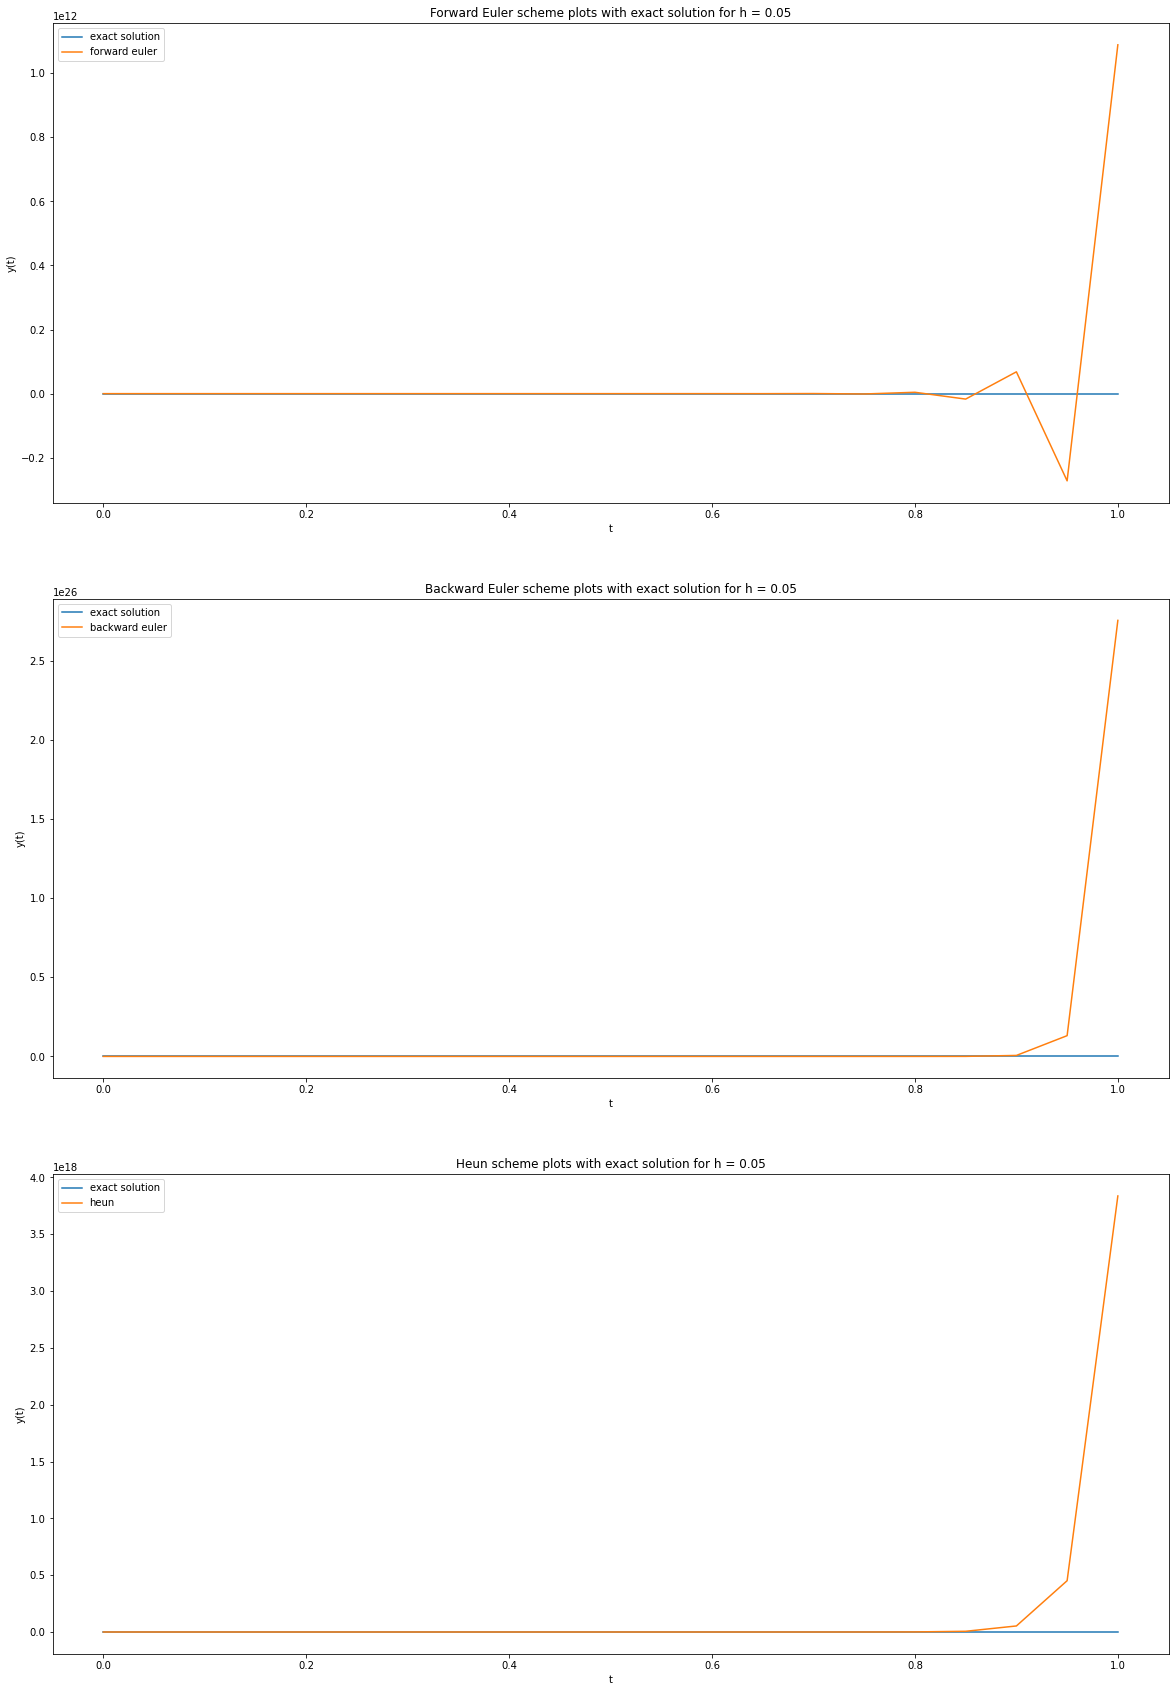

In [25]:
# Global variables
x_min = 0
x_max = 1
h = 0.05
a = 100
b = 1
y0 = 1
r=2

# Creating the grid points 
x = np.zeros(int((x_max-x_min)/h))
x[0] = x_min
for i in range(1, x.size):
    x[i] = x[i-1]+h
x = np.append(x, x_max)

# Creating table
first_row = ['t', 'forward', 'backward', 'heun', 'exact', 
             'f err(%)', 'b err(%)', 'heun err(%)']
table = [first_row]

# Calculating the exact solution and error
exact = np.zeros(x.size)
rows = np.zeros((x.size,8))
forward_error = np.zeros(x.size)
backward_error = np.zeros(x.size)
heun_error = np.zeros(x.size)


for i in range(0,x.size):
    exact[i] = y(x[i], a, b, y0)

    # Calculating relative error 
    forward_error[i] = np.abs((exact[i] - forward_euler(x, a, b)[i]) / exact[i])
    backward_error[i] = np.abs((exact[i] - backward_euler(x, a, b)[i]) / exact[i])
    heun_error[i] = np.abs((exact[i] - heun(x, a, b)[i]) / exact[i])
    """
    The relative error calculations are not multiplied by 100 as we do not want
    to plot percentages but values for error bars. In the table the values are listed
    as percents
    """
    # Calculating table rows
    rows[i,0] = x[i]
    rows[i,1] = forward_euler(x, a, b)[i].round(2)
    rows[i,2] = backward_euler(x, a, b)[i].round(2)
    rows[i,3] = heun(x, a, b)[i].round(2)
    rows[i,4] = exact[i].round(2)
    rows[i,5] = 100*forward_error[i].round(2)
    rows[i,6] = 100*backward_error[i].round(2)
    rows[i,7] = 100*heun_error[i].round(2)
    table.append(rows[i,:].tolist())

# Printing Table
title = 'Values of schemes, exact solution, and relative error for h=' +str(h)
title = title.center(20)
print(title, '\n')
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancygrid'))

# Plotting solutions with error

plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
plt.plot(x,exact, label="exact solution")
plt.plot(x, forward_euler(x, a, b), label="forward euler") # problem 1a
#plt.errorbar(x, forward_euler(x, a, b), yerr = forward_error, fmt = '-o') #problem 3a
plt.title('Forward Euler scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

plt.subplot(3,1,2)
plt.plot(x,exact, label="exact solution")
plt.plot(x, backward_euler(x, a, b), label="backward euler") # problem 2a
#plt.errorbar(x, backward_euler(x, a, b), yerr = backward_error, fmt = '-o') #problem 3a
plt.title('Backward Euler scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

plt.subplot(3,1,3)
plt.plot(x,exact, label="exact solution")
plt.plot(x, heun(x, a, b), label="heun") # problem 1a
#plt.errorbar(x, heun(x, a, b), yerr = heun_error, fmt = '-o') #problem 3a
plt.title('Heun scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

Values of schemes, exact solution, and relative error for h=0.025 

    t            forward          backward              heun    exact          f err(%)          b err(%)       heun err(%)
-----  -----------------  ----------------  ----------------  -------  ----------------  ----------------  ----------------
0            1                 1                 1               1          0                 0                 0
0.025       -1.48              4.71              1.62            0.09    1719              5072              1676
0.05         2.24             22.34              2.62            0.02   13642            137164             16017
0.075       -3.33            106.1               4.26            0.01   33689                 1.06959e+06   42820
0.1          5.02            503.93              6.91            0.01   54562                 5.48657e+06   75152
0.125       -7.51           2393.66             11.23            0.01   84293                 2.68412e+07  125777


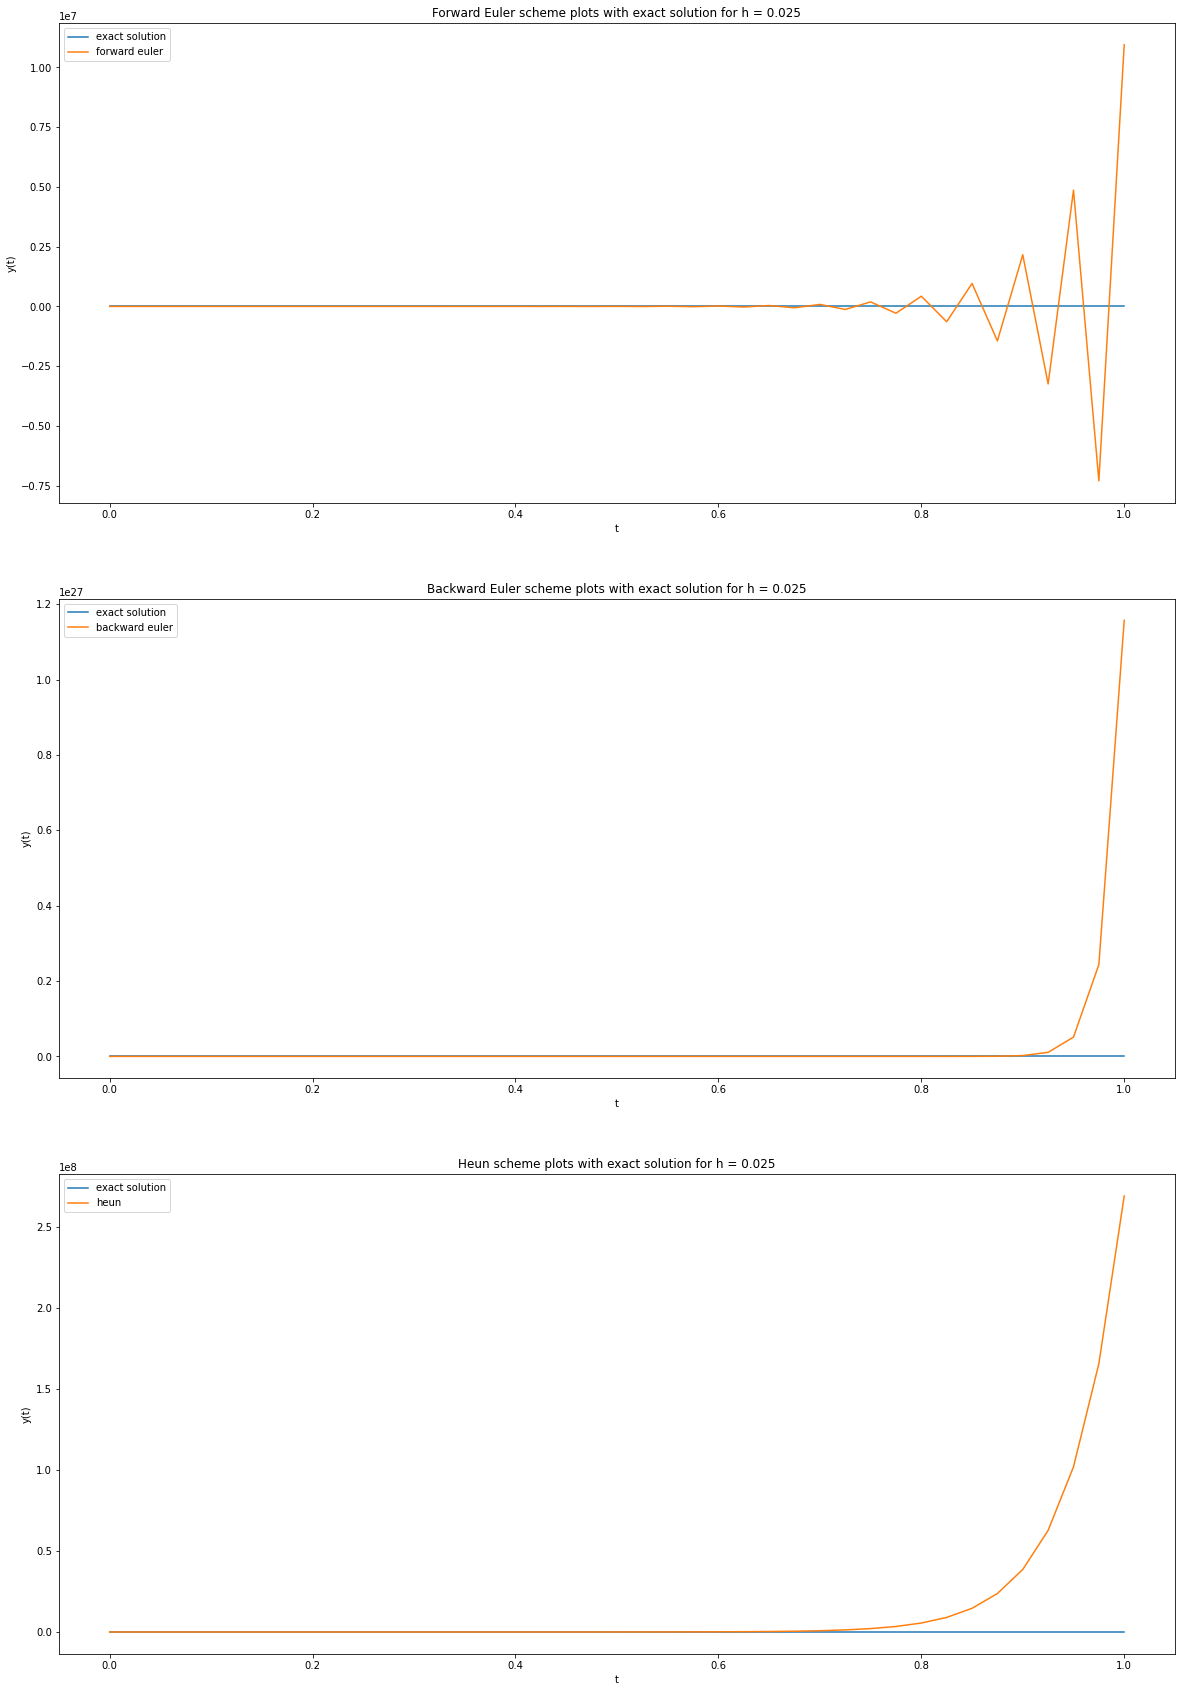

In [24]:
# Global variables
x_min = 0
x_max = 1
h = 0.025
a = 100
b = 1
y0 = 1
r=2

# Creating the grid points 
x = np.zeros(int((x_max-x_min)/h))
x[0] = x_min
for i in range(1, x.size):
    x[i] = x[i-1]+h
x = np.append(x, x_max)

# Creating table
first_row = ['t', 'forward', 'backward', 'heun', 'exact', 
             'f err(%)', 'b err(%)', 'heun err(%)']
table = [first_row]

# Calculating the exact solution and error
exact = np.zeros(x.size)
rows = np.zeros((x.size,8))
forward_error = np.zeros(x.size)
backward_error = np.zeros(x.size)
heun_error = np.zeros(x.size)


for i in range(0,x.size):
    exact[i] = y(x[i], a, b, y0)

    # Calculating relative error 
    forward_error[i] = np.abs((exact[i] - forward_euler(x, a, b)[i]) / exact[i])
    backward_error[i] = np.abs((exact[i] - backward_euler(x, a, b)[i]) / exact[i])
    heun_error[i] = np.abs((exact[i] - heun(x, a, b)[i]) / exact[i])
    """
    The relative error calculations are not multiplied by 100 as we do not want
    to plot percentages but values for error bars. In the table the values are listed
    as percents
    """
    # Calculating table rows
    rows[i,0] = x[i]
    rows[i,1] = forward_euler(x, a, b)[i].round(2)
    rows[i,2] = backward_euler(x, a, b)[i].round(2)
    rows[i,3] = heun(x, a, b)[i].round(2)
    rows[i,4] = exact[i].round(2)
    rows[i,5] = 100*forward_error[i].round(2)
    rows[i,6] = 100*backward_error[i].round(2)
    rows[i,7] = 100*heun_error[i].round(2)
    table.append(rows[i,:].tolist())

# Printing Table
title = 'Values of schemes, exact solution, and relative error for h=' +str(h)
title = title.center(20)
print(title, '\n')
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancygrid'))

# Plotting solutions with error

plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
plt.plot(x,exact, label="exact solution")
plt.plot(x, forward_euler(x, a, b), label="forward euler") # problem 1a
#plt.errorbar(x, forward_euler(x, a, b), yerr = forward_error, fmt = '-o') #problem 3a
plt.title('Forward Euler scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

plt.subplot(3,1,2)
plt.plot(x,exact, label="exact solution")
plt.plot(x, backward_euler(x, a, b), label="backward euler") # problem 2a
#plt.errorbar(x, backward_euler(x, a, b), yerr = backward_error, fmt = '-o') #problem 3a
plt.title('Backward Euler scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

plt.subplot(3,1,3)
plt.plot(x,exact, label="exact solution")
plt.plot(x, heun(x, a, b), label="heun") # problem 1a
#plt.errorbar(x, heun(x, a, b), yerr = heun_error, fmt = '-o') #problem 3a
plt.title('Heun scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

Values of schemes, exact solution, and relative error for h=0.01 

   t    forward    backward    heun    exact    f err(%)    b err(%)    heun err(%)
----  ---------  ----------  ------  -------  ----------  ----------  -------------
0          1           1       1        1              0           0              0
0.01       0.01        1       0.5      0.37          97         167             35
0.02       0.01        1       0.26     0.14          93         595             79
0.03       0.01        1       0.13     0.06          83        1592            126
0.04       0.01        1       0.07     0.03          65        3491            157
0.05       0.01        1       0.04     0.02          41        6040            149
0.06       0.01        1       0.02     0.01          21        8252            109
0.07       0.01        1       0.02     0.01           9        9583             66
0.08       0.01        1       0.01     0.01           3       10248             37
0.09     

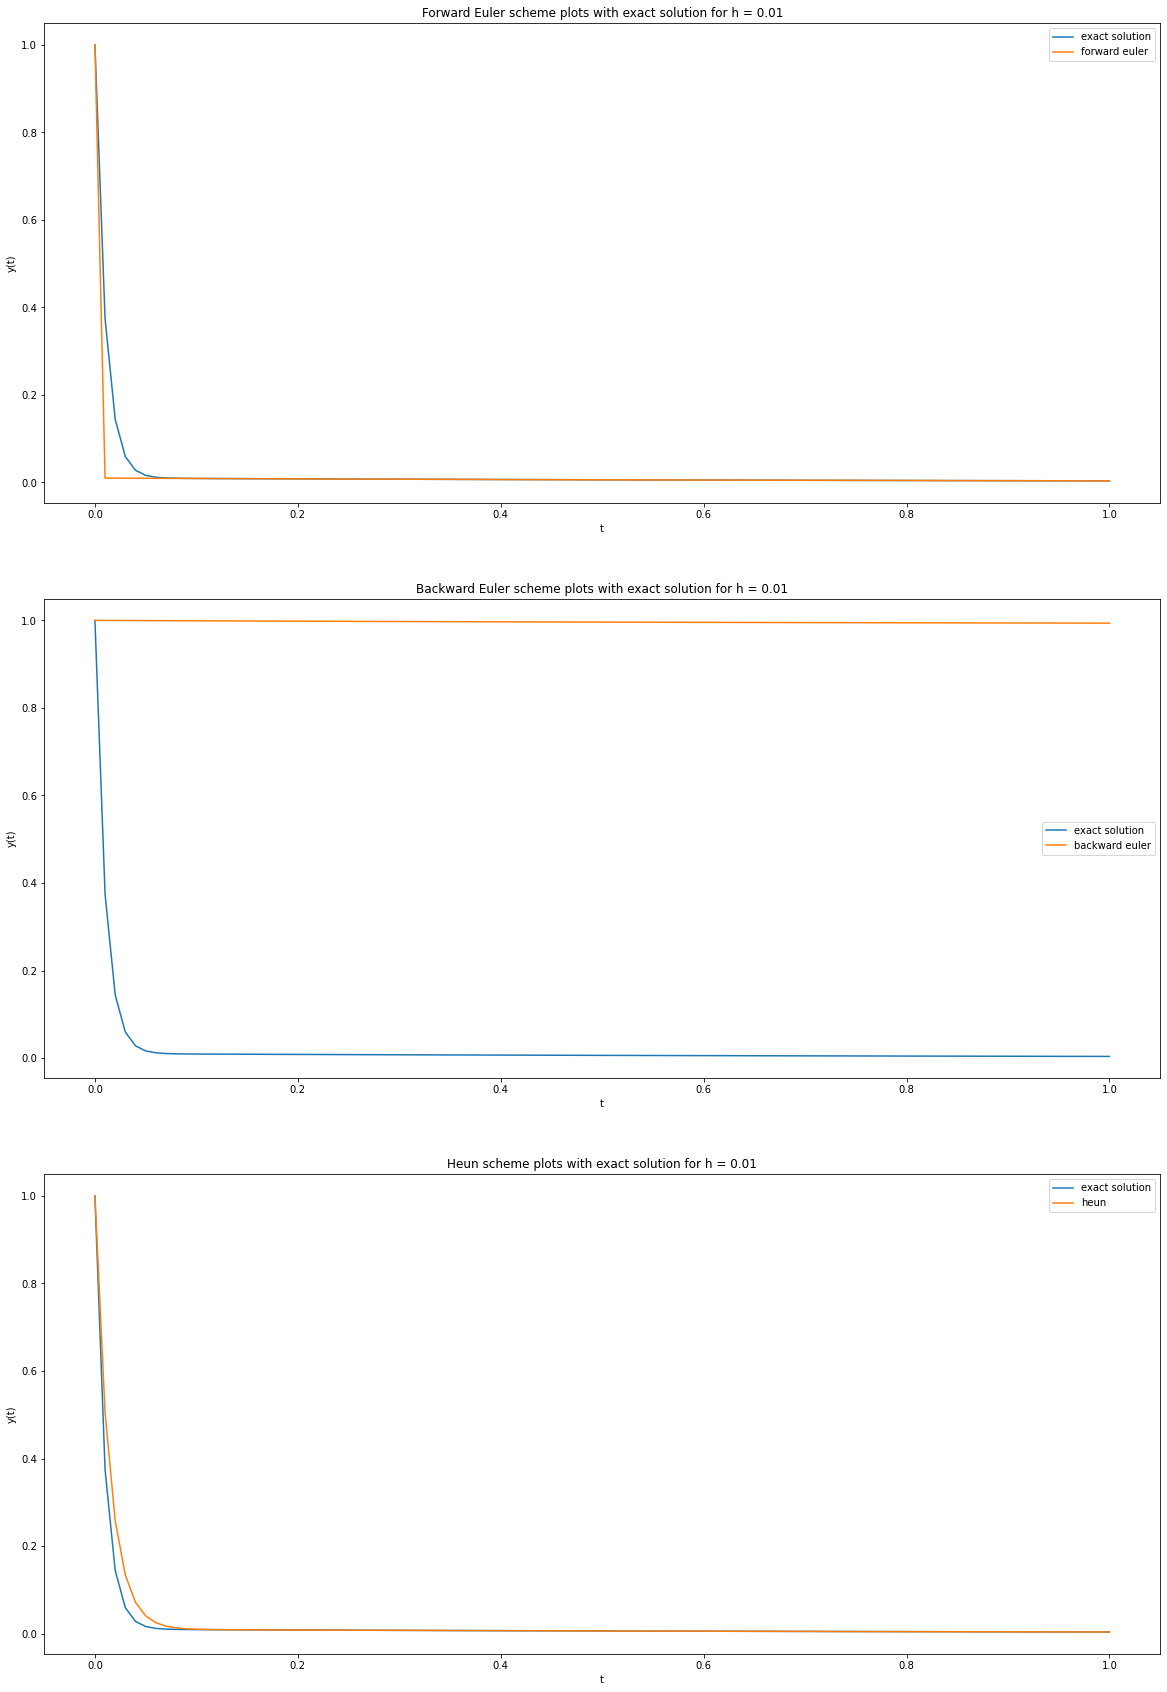

In [23]:
# Global variables
x_min = 0
x_max = 1
h = 0.01
a = 100
b = 1
y0 = 1
r=2

# Creating the grid points 
x = np.zeros(int((x_max-x_min)/h))
x[0] = x_min
for i in range(1, x.size):
    x[i] = x[i-1]+h
x = np.append(x, x_max)

# Creating table
first_row = ['t', 'forward', 'backward', 'heun', 'exact', 
             'f err(%)', 'b err(%)', 'heun err(%)']
table = [first_row]

# Calculating the exact solution and error
exact = np.zeros(x.size)
rows = np.zeros((x.size,8))
forward_error = np.zeros(x.size)
backward_error = np.zeros(x.size)
heun_error = np.zeros(x.size)


for i in range(0,x.size):
    exact[i] = y(x[i], a, b, y0)

    # Calculating relative error 
    forward_error[i] = np.abs((exact[i] - forward_euler(x, a, b)[i]) / exact[i])
    backward_error[i] = np.abs((exact[i] - backward_euler(x, a, b)[i]) / exact[i])
    heun_error[i] = np.abs((exact[i] - heun(x, a, b)[i]) / exact[i])
    """
    The relative error calculations are not multiplied by 100 as we do not want
    to plot percentages but values for error bars. In the table the values are listed
    as percents
    """
    # Calculating table rows
    rows[i,0] = x[i]
    rows[i,1] = forward_euler(x, a, b)[i].round(2)
    rows[i,2] = backward_euler(x, a, b)[i].round(2)
    rows[i,3] = heun(x, a, b)[i].round(2)
    rows[i,4] = exact[i].round(2)
    rows[i,5] = 100*forward_error[i].round(2)
    rows[i,6] = 100*backward_error[i].round(2)
    rows[i,7] = 100*heun_error[i].round(2)
    table.append(rows[i,:].tolist())

# Printing Table
title = 'Values of schemes, exact solution, and relative error for h=' +str(h)
title = title.center(20)
print(title, '\n')
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancygrid'))

# Plotting solutions with error

plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
plt.plot(x,exact, label="exact solution")
plt.plot(x, forward_euler(x, a, b), label="forward euler") # problem 1a
#plt.errorbar(x, forward_euler(x, a, b), yerr = forward_error, fmt = '-o') #problem 3a
plt.title('Forward Euler scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

plt.subplot(3,1,2)
plt.plot(x,exact, label="exact solution")
plt.plot(x, backward_euler(x, a, b), label="backward euler") # problem 2a
#plt.errorbar(x, backward_euler(x, a, b), yerr = backward_error, fmt = '-o') #problem 3a
plt.title('Backward Euler scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

plt.subplot(3,1,3)
plt.plot(x,exact, label="exact solution")
plt.plot(x, heun(x, a, b), label="heun") # problem 1a
#plt.errorbar(x, heun(x, a, b), yerr = heun_error, fmt = '-o') #problem 3a
plt.title('Heun scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

### Discussion

For these problems I have omitted graphing the errorbars and instead rely on the table for viewing the error. The reason for this is that for many of these plots the inclusion of the error bars obscures the shape of the graph due to being so large. For h = 0.05 and h=0.025 these schemes do not appear to be stable. At h=0.01, the backward scheme does not appear stable but the forward and heun scheme do appear to have some stability to them. At a certain time scale the error decreases rapidly. There must be a stability condition that could be found using Von Neuman analysis, or tweaks to the scheme that could be made to make them unconditionally stable for the stiff problem. However, I will not attempt to do this here.

## Bonus Problem 3c

### Analytic Solution

For the purposes for checking the accuracy of the scheme and to measure the error, I calculate the exact analytic solution as that is possible for this equation.

$\alpha=\beta=1$

$\dot{y}=-y + e^{-t}$

$\dot{y} + y = + e^{-t}$

$e^{t} \dot{y} + e^{t} y = e^{-t} e^{t}$ 

$\frac{d}{dt}[e^{t}y]=1$

$\int\frac{d}{dt}[e^{t}y]dt=\int 1 dt$

$e^{t}y=t+C$

$y(t)=e^{-t}(t+C)$

Solving for the initial condition

$y(0)=e^{0}(0+C)$

$\therefore$

$C=0$

$y(t)=te^{-t}$

Values of schemes, exact solution, and relative error for h=0.05 

   t    forward    backward    heun    exact    f err(%)    b err(%)    heun err(%)
----  ---------  ----------  ------  -------  ----------  ----------  -------------
0          0           0       0        0              0           0              0
0.05       0.05        0.05    0.05     0.05           5           5              0
0.1        0.1         0.09    0.09     0.09           5           5              0
0.15       0.14        0.12    0.13     0.13           5           5              0
0.2        0.17        0.16    0.16     0.16           5           5              0
0.25       0.2         0.18    0.19     0.19           5           5              0
0.3        0.23        0.21    0.22     0.22           5           5              0
0.35       0.26        0.23    0.25     0.25           5           5              0
0.4        0.28        0.26    0.27     0.27           5           5              0
0.45     

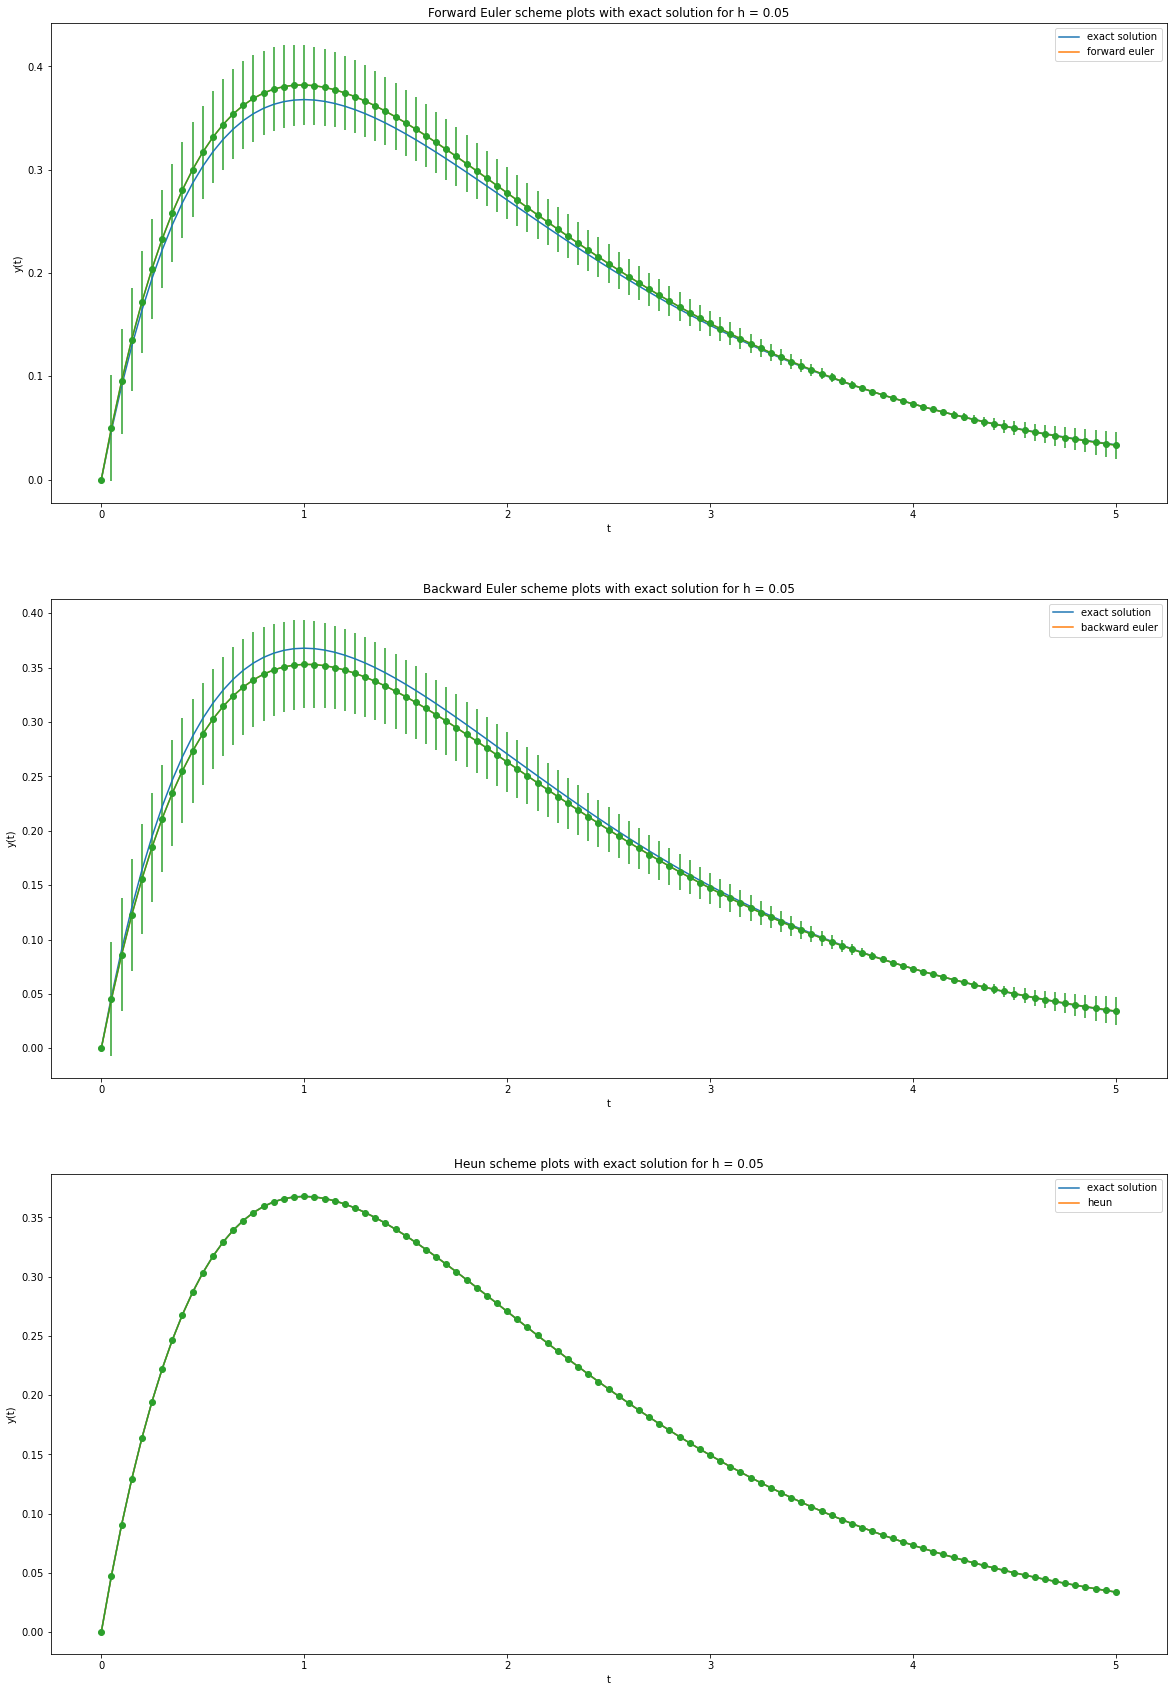

In [12]:
def y(t, a, b ,y0):
    return t * np.e**(-t)

# Global variables
x_min = 0
x_max = 5
h = 0.05
a = 1
b = 1
y0 = 0

# Creating the grid points 
x = np.zeros(int((x_max-x_min)/h))
x[0] = x_min
for i in range(1, x.size):
    x[i] = x[i-1]+h
x = np.append(x, x_max)

# Creating table
first_row = ['t', 'forward', 'backward', 'heun', 'exact', 
             'f err(%)', 'b err(%)', 'heun err(%)']
table = [first_row]

# Calculating the exact solution and error
exact = np.zeros(x.size)
rows = np.zeros((x.size,8))
forward_error = np.zeros(x.size)
backward_error = np.zeros(x.size)
heun_error = np.zeros(x.size)


for i in range(0,x.size):
    exact[i] = y(x[i], a, b, y0)

    # Calculating relative error 
    if i != 0:
        forward_error[i] = np.abs((exact[i] - forward_euler(x, a, b)[i]) / exact[i])
        backward_error[i] = np.abs((exact[i] - backward_euler(x, a, b)[i]) / exact[i])
        heun_error[i] = np.abs((exact[i] - heun(x, a, b)[i]) / exact[i])
    """
    The relative error calculations are not multiplied by 100 as we do not want
    to plot percentages but values for error bars. In the table the values are listed
    as percents
    """
    # Calculating table rows
    rows[i,0] = x[i]
    rows[i,1] = forward_euler(x, a, b)[i].round(2)
    rows[i,2] = backward_euler(x, a, b)[i].round(2)
    rows[i,3] = heun(x, a, b)[i].round(2)
    rows[i,4] = exact[i].round(2)
    rows[i,5] = 100*forward_error[i].round(2)
    rows[i,6] = 100*backward_error[i].round(2)
    rows[i,7] = 100*heun_error[i].round(2)
    table.append(rows[i,:].tolist())

# Printing Table
title = 'Values of schemes, exact solution, and relative error for h=' +str(h)
title = title.center(20)
print(title, '\n')
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancygrid'))

# Plotting solutions with error

plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
plt.plot(x,exact, label="exact solution")
plt.plot(x, forward_euler(x, a, b), label="forward euler") # problem 1a
plt.errorbar(x, forward_euler(x, a, b), yerr = forward_error, fmt = '-o') #problem 3a
plt.title('Forward Euler scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

plt.subplot(3,1,2)
plt.plot(x,exact, label="exact solution")
plt.plot(x, backward_euler(x, a, b), label="backward euler") # problem 2a
plt.errorbar(x, backward_euler(x, a, b), yerr = backward_error, fmt = '-o') #problem 3a
plt.title('Backward Euler scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

plt.subplot(3,1,3)
plt.plot(x,exact, label="exact solution")
plt.plot(x, heun(x, a, b), label="heun") # problem 1a
plt.errorbar(x, heun(x, a, b), yerr = heun_error, fmt = '-o') #problem 3a
plt.title('Heun scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

Values of schemes, exact solution, and relative error for h=0.025 

    t    forward    backward    heun    exact    f err(%)    b err(%)    heun err(%)
-----  ---------  ----------  ------  -------  ----------  ----------  -------------
0           0           0       0        0              0           0              0
0.025       0.02        0.02    0.02     0.02           3           3              0
0.05        0.05        0.05    0.05     0.05           3           3              0
0.075       0.07        0.07    0.07     0.07           2           3              0
0.1         0.09        0.09    0.09     0.09           2           3              0
0.125       0.11        0.11    0.11     0.11           2           3              0
0.15        0.13        0.13    0.13     0.13           2           2              0
0.175       0.15        0.14    0.15     0.15           2           2              0
0.2         0.17        0.16    0.16     0.16           2           2             

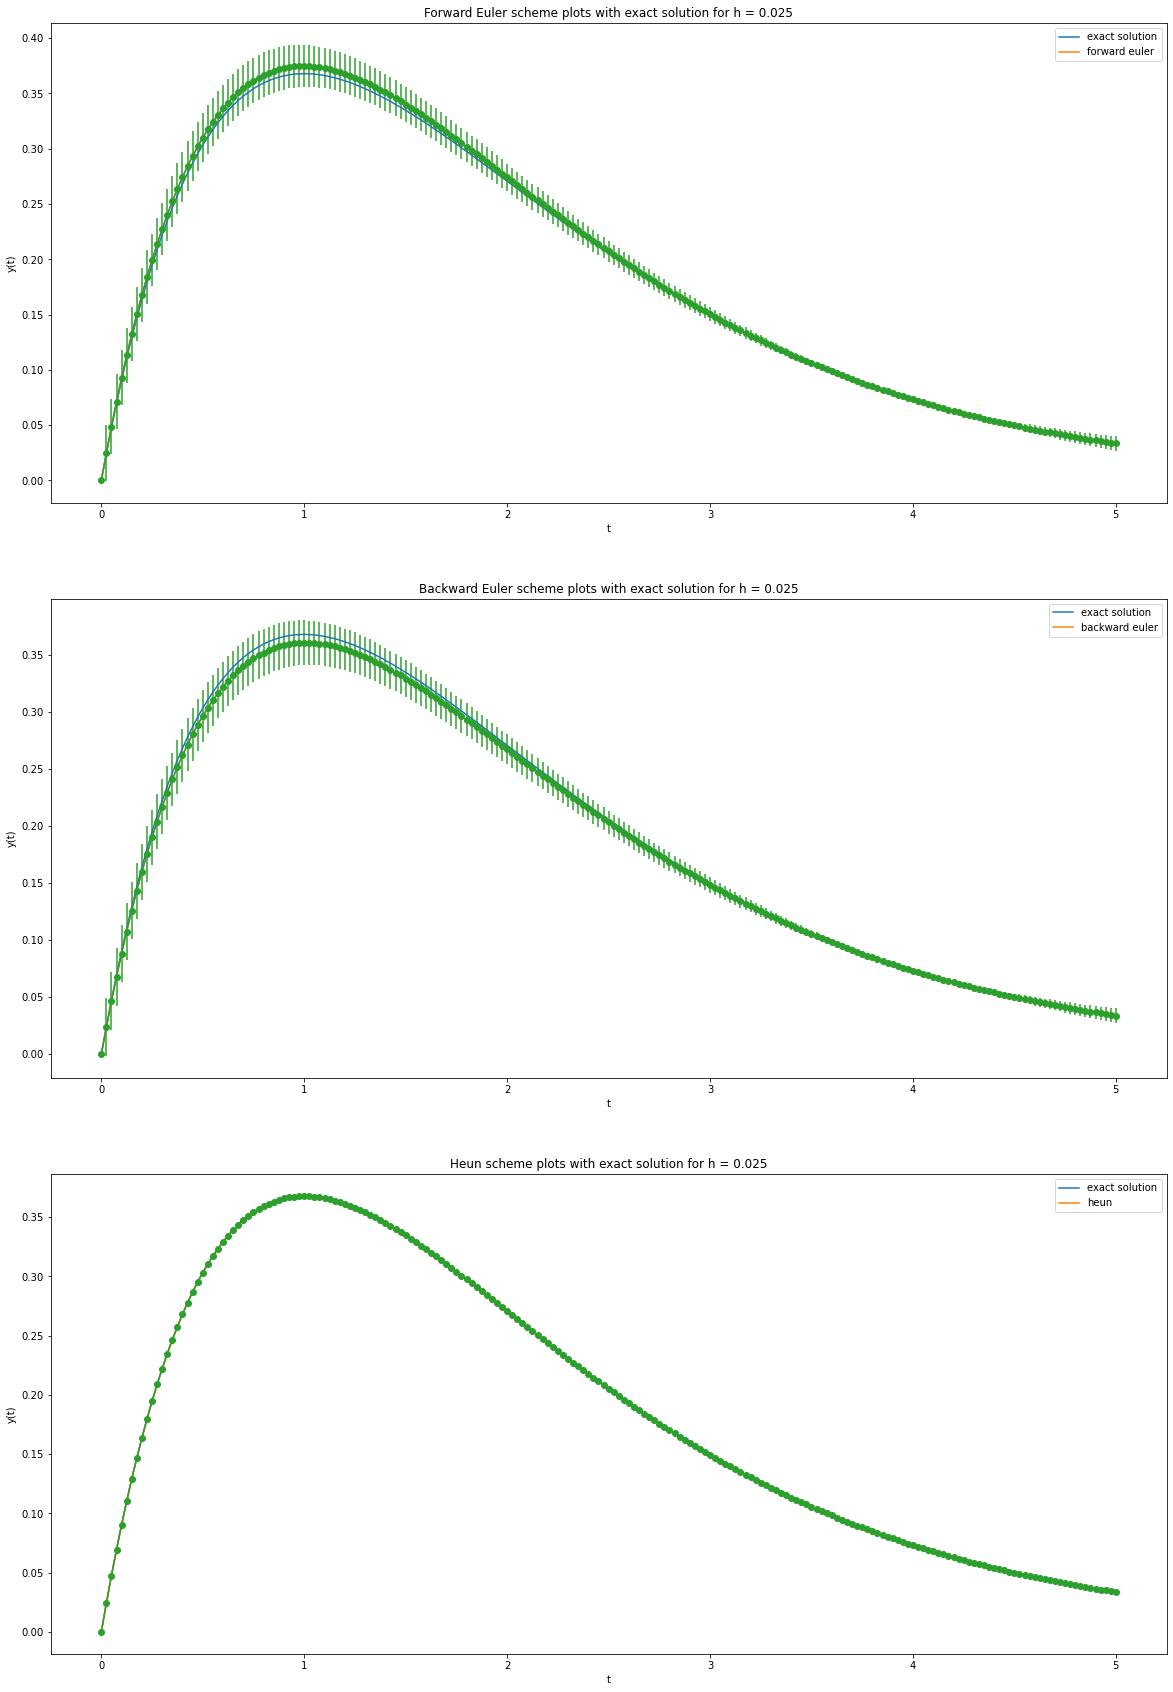

In [13]:
def y(t, a, b ,y0):
    return t * np.e**(-t)

# Global variables
x_min = 0
x_max = 5
h = 0.025
a = 1
b = 1
y0 = 0

# Creating the grid points 
x = np.zeros(int((x_max-x_min)/h))
x[0] = x_min
for i in range(1, x.size):
    x[i] = x[i-1]+h
x = np.append(x, x_max)

# Creating table
first_row = ['t', 'forward', 'backward', 'heun', 'exact', 
             'f err(%)', 'b err(%)', 'heun err(%)']
table = [first_row]

# Calculating the exact solution and error
exact = np.zeros(x.size)
rows = np.zeros((x.size,8))
forward_error = np.zeros(x.size)
backward_error = np.zeros(x.size)
heun_error = np.zeros(x.size)


for i in range(0,x.size):
    exact[i] = y(x[i], a, b, y0)

    # Calculating relative error 
    if i != 0:
        forward_error[i] = np.abs((exact[i] - forward_euler(x, a, b)[i]) / exact[i])
        backward_error[i] = np.abs((exact[i] - backward_euler(x, a, b)[i]) / exact[i])
        heun_error[i] = np.abs((exact[i] - heun(x, a, b)[i]) / exact[i])
    """
    The relative error calculations are not multiplied by 100 as we do not want
    to plot percentages but values for error bars. In the table the values are listed
    as percents
    """
    # Calculating table rows
    rows[i,0] = x[i]
    rows[i,1] = forward_euler(x, a, b)[i].round(2)
    rows[i,2] = backward_euler(x, a, b)[i].round(2)
    rows[i,3] = heun(x, a, b)[i].round(2)
    rows[i,4] = exact[i].round(2)
    rows[i,5] = 100*forward_error[i].round(2)
    rows[i,6] = 100*backward_error[i].round(2)
    rows[i,7] = 100*heun_error[i].round(2)
    table.append(rows[i,:].tolist())

# Printing Table
title = 'Values of schemes, exact solution, and relative error for h=' +str(h)
title = title.center(20)
print(title, '\n')
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancygrid'))

# Plotting solutions with error

plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
plt.plot(x,exact, label="exact solution")
plt.plot(x, forward_euler(x, a, b), label="forward euler") # problem 1a
plt.errorbar(x, forward_euler(x, a, b), yerr = forward_error, fmt = '-o') #problem 3a
plt.title('Forward Euler scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

plt.subplot(3,1,2)
plt.plot(x,exact, label="exact solution")
plt.plot(x, backward_euler(x, a, b), label="backward euler") # problem 2a
plt.errorbar(x, backward_euler(x, a, b), yerr = backward_error, fmt = '-o') #problem 3a
plt.title('Backward Euler scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

plt.subplot(3,1,3)
plt.plot(x,exact, label="exact solution")
plt.plot(x, heun(x, a, b), label="heun") # problem 1a
plt.errorbar(x, heun(x, a, b), yerr = heun_error, fmt = '-o') #problem 3a
plt.title('Heun scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

Values of schemes, exact solution, and relative error for h=0.01 

   t    forward    backward    heun    exact    f err(%)    b err(%)    heun err(%)
----  ---------  ----------  ------  -------  ----------  ----------  -------------
0          0           0       0        0              0           0              0
0.01       0.01        0.01    0.01     0.01           1           1              0
0.02       0.02        0.02    0.02     0.02           1           1              0
0.03       0.03        0.03    0.03     0.03           1           1              0
0.04       0.04        0.04    0.04     0.04           1           1              0
0.05       0.05        0.05    0.05     0.05           1           1              0
0.06       0.06        0.06    0.06     0.06           1           1              0
0.07       0.07        0.06    0.07     0.07           1           1              0
0.08       0.07        0.07    0.07     0.07           1           1              0
0.09     

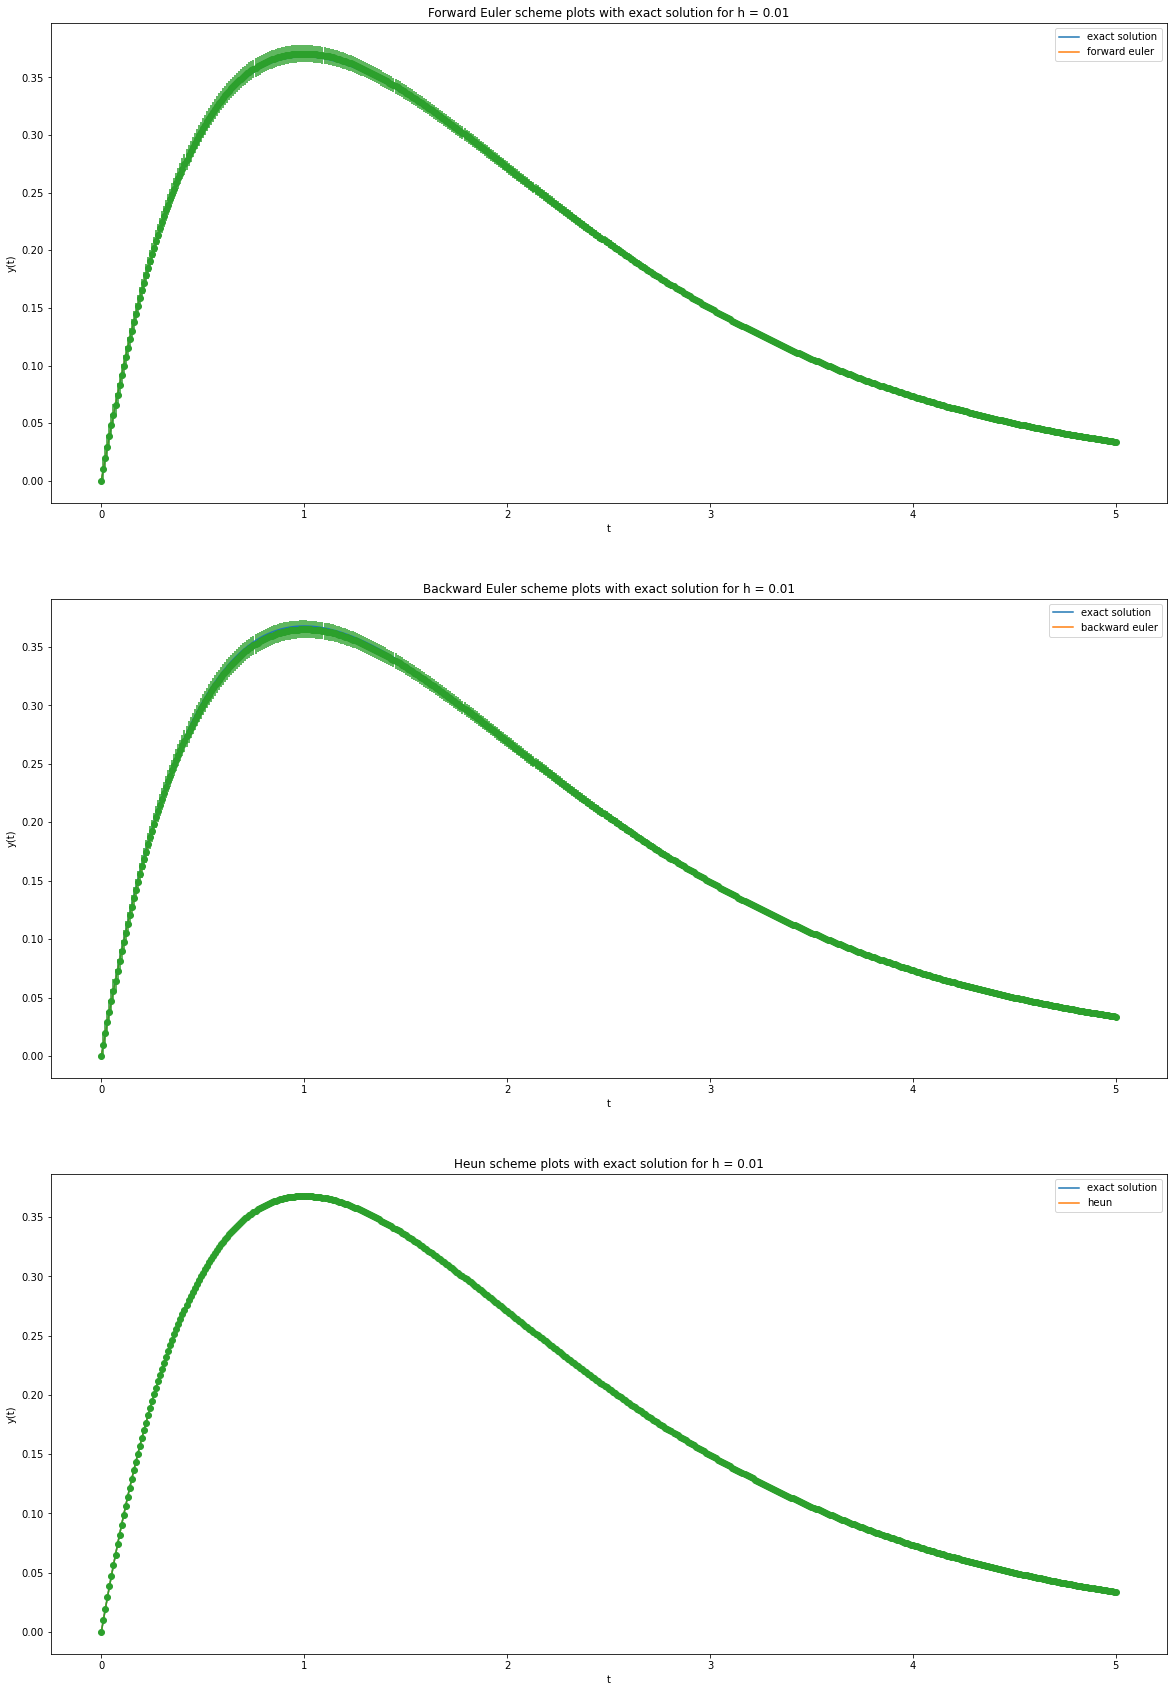

In [14]:
def y(t, a, b ,y0):
    return t * np.e**(-t)

# Global variables
x_min = 0
x_max = 5
h = 0.01
a = 1
b = 1
y0 = 0

# Creating the grid points 
x = np.zeros(int((x_max-x_min)/h))
x[0] = x_min
for i in range(1, x.size):
    x[i] = x[i-1]+h
x = np.append(x, x_max)

# Creating table
first_row = ['t', 'forward', 'backward', 'heun', 'exact', 
             'f err(%)', 'b err(%)', 'heun err(%)']
table = [first_row]

# Calculating the exact solution and error
exact = np.zeros(x.size)
rows = np.zeros((x.size,8))
forward_error = np.zeros(x.size)
backward_error = np.zeros(x.size)
heun_error = np.zeros(x.size)


for i in range(0,x.size):
    exact[i] = y(x[i], a, b, y0)

    # Calculating relative error 
    if i != 0:
        forward_error[i] = np.abs((exact[i] - forward_euler(x, a, b)[i]) / exact[i])
        backward_error[i] = np.abs((exact[i] - backward_euler(x, a, b)[i]) / exact[i])
        heun_error[i] = np.abs((exact[i] - heun(x, a, b)[i]) / exact[i])
    """
    The relative error calculations are not multiplied by 100 as we do not want
    to plot percentages but values for error bars. In the table the values are listed
    as percents
    """
    # Calculating table rows
    rows[i,0] = x[i]
    rows[i,1] = forward_euler(x, a, b)[i].round(2)
    rows[i,2] = backward_euler(x, a, b)[i].round(2)
    rows[i,3] = heun(x, a, b)[i].round(2)
    rows[i,4] = exact[i].round(2)
    rows[i,5] = 100*forward_error[i].round(2)
    rows[i,6] = 100*backward_error[i].round(2)
    rows[i,7] = 100*heun_error[i].round(2)
    table.append(rows[i,:].tolist())

# Printing Table
title = 'Values of schemes, exact solution, and relative error for h=' +str(h)
title = title.center(20)
print(title, '\n')
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancygrid'))

# Plotting solutions with error

plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
plt.plot(x,exact, label="exact solution")
plt.plot(x, forward_euler(x, a, b), label="forward euler") # problem 1a
plt.errorbar(x, forward_euler(x, a, b), yerr = forward_error, fmt = '-o') #problem 3a
plt.title('Forward Euler scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

plt.subplot(3,1,2)
plt.plot(x,exact, label="exact solution")
plt.plot(x, backward_euler(x, a, b), label="backward euler") # problem 2a
plt.errorbar(x, backward_euler(x, a, b), yerr = backward_error, fmt = '-o') #problem 3a
plt.title('Backward Euler scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

plt.subplot(3,1,3)
plt.plot(x,exact, label="exact solution")
plt.plot(x, heun(x, a, b), label="heun") # problem 1a
plt.errorbar(x, heun(x, a, b), yerr = heun_error, fmt = '-o') #problem 3a
plt.title('Heun scheme plots with exact solution for h = ' + str(h))
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()

### Discussion

The schemes here seem remarkably accurate for each h and we can see by the table. Particularly the heun scheme shows so little error that it registers as 0%